In [2]:
### Celda para ejecutar en google Colab

from google.colab import drive
import os
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Multiples_anotadores/Pruebas/models'

os.chdir(root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#!pip install tf-nightly
from MA_pi_tanh_keras import *

In [13]:
database = 'pima-indians-diabetes1' #['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']

sh_ind = loadmat('/content/gdrive/My Drive/Multiples_anotadores/data/shuffled_index_'+database+'.mat')['sh_ind']
data_path = '/content/gdrive/My Drive/Multiples_anotadores/data/' + database +'.mat' 
data = loadmat(data_path)
#heads = data['MAData'].dtype
X = data['MAData']['X'][0,0]
t = data['MAData']['t'][0,0]
Y = data['MAData']['Y1'][0,0]

if len(np.unique(Y))!=2:
  Y = Y - 1
  t = t - 1
  
acc = []
auc = []

i=28

Xtrain, Ytrain, ttrain, Xtest, Ytest, ttest = data_partitionMA(X,Y,t,sh_ind,0.7,i)

In [14]:
#Xtrain, Ytrain, ttrain = X, Y, t

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Se añaden anotadores maliciosos
N = X.shape[0]
N_train = Xtrain.shape[0]
P = X.shape[1]
K = np.unique(t).size

NMal = []
AUC = []
Acc = []
for j in range(65):
  if j != 0:
    p = 0.5
    alpha = np.random.binomial(1, p,size=(N_train))
    Yaux = ttrain.copy()
    Yaux[alpha==1] = 1-ttrain[alpha==1]
    Ytrain = np.concatenate((Ytrain,Yaux),axis=1)
  # print(Ytrain.shape)
  R = Ytrain.shape[1] 
  print(R)

  Xtrainf = np.concatenate((Xtrain, Ytrain),1)
  Xtestf = np.concatenate((Xtest, Ytest),1)

  model = Keras_MA_pi_kern(K=K, R=R, P=P, epochs=150, batch_size=min(256, N_train), 
                          validation_split=0, learning_rate=0.05, ratio_lin=0.7,
                          ratio=1.3, verbose=0, scale=1, RBFout=7,
                          l1=0.01, l2=0.01, w_init='PCdA', seed=100, optimizer='RMS', 
                          dropout=True)

  model.fit(Xtrainf, ttrain)


  #acc = np.mean(model.predict(Xtestf)==ttest.T)

  #try:
  #  auc = roc_auc_score(ook(ttest), model.predict_proba(Xtestf))
  #except:
  #  auc = 0.5



  y_probas = np.stack([model.model(Xtestf[:,:P], training=True)[:,:K] # se activa training en True para que el Dropout se aplique
                      for sample in range(200)])

  pred = np.mean(y_probas, axis=0)
  #pred = np.mean([model.predict_proba(Xtestf) for sample in range(100)], axis=0)

  acc = np.mean(np.argmax(pred, axis=1)==ttest.T)

  try:
    auc = roc_auc_score(ook(ttest), pred)
  except:
    auc = 0.5
  
  NMal.append(j)
  AUC.append(auc)
  Acc.append(acc) 

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


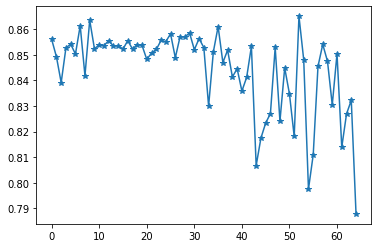

In [16]:
import matplotlib.pyplot as plt
plt.plot(NMal,AUC,'*-')

In [ ]:
# for j in range(21):
#   if j != 0:
#     p = 0.6
#     alpha = np.random.binomial(1, p,size=(N_train))
#     Yaux = ttrain.copy()
#     Yaux[alpha==1] = 1-ttrain[alpha==1]
#     Ytrain = np.concatenate((Ytrain,Yaux),axis=1)

In [17]:
print(Ytrain.shape)
from scipy.io import savemat
savemat('DataExpSpamm.mat', {'Xtrain':Xtrain, 'Ytrain':Ytrain, 'ttest':ttest, 'Xtest':Xtest})

(538, 69)


In [ ]:
# for r in range(Ytrain.shape[1]):
#   print(roc_auc_score(ook(ttrain), ook(Ytrain[:,r:r+1])))
#   # print(np.mean(Ytrain[:,r:1]==ttrain))

0.8974256080997653
0.6528275095690825
0.4865724163476972
0.38307198419557964
0.32220027163847387
0.5443264600567972
0.5248487467588592
0.513797999753056
0.504398691196444
0.48864057291023577
0.5333374490677861
0.5079330781577973
0.49975305593283115
0.480522286702062
0.5102018767749106
0.5397425608099766
0.5181349549327077
0.4904154833930115
0.5013427583652303
0.49388813433757256
0.48620200024694404
0.5107420669218421
0.48742128657858996
0.5056797135448821
0.5056797135448821
0.5128256574885788
0.4793030003704162
0.4641005062353377
0.49053895542659587
0.5220397579948142
0.4639770342017533
0.49157303370786515
0.5107420669218421
0.49853376960118534
0.4708142980614891
0.4998147919496234
0.5024385726632917
0.4891344610445734
0.4642239782689221
0.5112359550561798
0.5120848252870724
0.4777132979380171
0.4956630448203482
0.5139832078034325
0.4888875169774046
0.5057414495616743
0.4820502531176689
0.532056426719348
0.49584825287072476
0.4724657365106803
0.5056179775280899
0.4831460674157303
0.484

In [ ]:
NMal = np.asarray(NMal)
AUC = np.asarray(AUC)
datMCGP = np.concatenate((NMal.reshape((21,1)),AUC.reshape((21,1))), axis=1)
DatMCGP = pd.DataFrame(datMCGP,columns =None, index=None) 
#print(DatQ_0)
name = 'RCDNN1' + '.dat'
DatMCGP.to_csv(name,index=False, header=False,sep = " ")

In [ ]:
from scipy.io import savemat
savemat('DataExpM.mat', {'Xtrain':Xtrain, 'Ytrain':Ytrain, 'ttest':ttest, 'Xtest':Xtest})

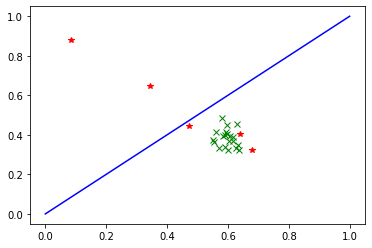

In [ ]:
from sklearn import metrics
# Creating the confusion matrix
spe = np.zeros((Ytrain.shape[1],1))
sen = np.zeros((Ytrain.shape[1],1))
for r in range(Ytrain.shape[1]):
  cm = metrics.confusion_matrix(ttrain, Ytrain[:,r])
  TP = cm[1][1]
  TN = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]
  sen[r] = (TP / float(TP + FN))
  spe[r] = (TN / float(TN + FP))
  if r < 5:
    plt.plot(1-spe[r],sen[r],'r*')
  else:
    plt.plot(1-spe[r],sen[r],'gx')
plt.plot([0,1],[0,1],'b')

In [ ]:
NMal = np.asarray(NMal)
AUC = np.asarray(AUC)
datMCGP = np.concatenate(((1-spe[5:]).reshape((20,1)),sen[5:].reshape((20,1))), axis=1)
DatMCGP = pd.DataFrame(datMCGP,columns =None, index=None) 
#print(DatQ_0)
name = 'AnnMal' + '.dat'
DatMCGP.to_csv(name,index=False, header=False,sep = " ")

In [ ]:
NMal = np.asarray(NMal)
AUC = np.asarray(AUC)
datMCGP = np.concatenate(((1-spe[5:]).reshape((65,1)),sen[5:].reshape((65,1))), axis=1)
DatMCGP = pd.DataFrame(datMCGP,columns =None, index=None) 
#print(DatQ_0)
name = 'AnnSpamm' + '.dat'
DatMCGP.to_csv(name,index=False, header=False,sep = " ")

In [ ]:
NMal = np.asarray(NMal)
AUC = np.asarray(AUC)
datMCGP = np.concatenate(((1-spe[:5]).reshape((5,1)),sen[:5].reshape((5,1))), axis=1)
DatMCGP = pd.DataFrame(datMCGP,columns =None, index=None) 
#print(DatQ_0)
name = 'AnnOr' + '.dat'
DatMCGP.to_csv(name,index=False, header=False,sep = " ")

In [ ]:
X[1,:]

array([1, 1, 2, 1, 1, 2, 3, 2, 2], dtype=uint8)